In [5]:
import json

In [8]:
cd data\ collection

/Users/evansadler/Desktop/Project Files/data collection


In [9]:
with open('Seattle.json', 'r') as f:
    js = json.load(f)

In [10]:
dic = {}

for geo in js['features']:
    fp = geo['geometry']['coordinates'][0][0]
    lat_max, lat_min = fp[1], fp[1]
    lng_max, lng_min = fp[0], fp[0]
    for point in geo['geometry']['coordinates'][0]:
        if point[1] > lat_max:
            lat_max = point[1]
        elif point[1] < lat_min:
            lat_min = point[1]
        if point[0] > lng_max:
            lng_max = point[0]
        elif point[0] < lng_min:
            lng_min = point[0]
    dic[geo['properties']['REGIONID']] = [lat_min, lng_min, lat_max, lng_max]



In [33]:
with open('yelp_json.json', 'w') as outfile:
    json.dump(dic, outfile)

In [5]:
cd data\ collection

/Users/evansadler/Desktop/Project Files/data collection


In [6]:
from yelp_class_keyword import Yelp

In [17]:
y = Yelp('Seattle','WA',dic)

In [18]:
y.yelp_data(140, 'nightlife')

KeyError: 'businesses'

In [11]:
dic[271892] = [dic[271892][0][1], dic[271892][1][0], dic[271892][1][1], dic[271892][0][0]]

In [12]:
import pandas as pd 
import numpy as np
from pymongo import MongoClient

city = 'Seattle'
state = 'WA'
client = MongoClient('localhost', 27017)
db = client['neighborhood_recommender']
yelp_collection = db['yelp_data_new' + '_' + city + '_' + state]
cursor = yelp_collection.find()
data = [hood for hood in cursor]
df = pd.DataFrame(data)

In [13]:
group = df.groupby(['hood_id','category'])['id'].count()

In [14]:
df_g = pd.DataFrame(group).reset_index()

In [15]:
df_g = df_g.pivot(index = 'hood_id', values = 'id', columns = 'category')

In [16]:
df_g.fillna(0, inplace = True)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(df_g, figsize=(12, 12))

In [19]:
df_g.drop(['auto', 'homeservices'], axis = 1, inplace = True)

In [20]:
from sklearn.decomposition import PCA, SparsePCA,TruncatedSVD
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score

In [23]:
cd Dimension\ Reduction

/Users/evansadler/Desktop/Project Files/Dimension Reduction


In [24]:
from pca_class import ReduceFeatures

In [286]:
rf = ReduceFeatures(df_g, df_g.index)
rf.preprocessing(0)
rf.crimes = pd.Index(rf.crimes)
# rf.hcluster_cols(0.10)
# rf.preprocessing(0)

df_c = rf.sparse_pca(n_components = 3)
rf.best_cluster()

For n_clusters = 3 The average silhouette_score is : 0.655799044278
For n_clusters = 4 The average silhouette_score is : 0.576239828175
For n_clusters = 5 The average silhouette_score is : 0.577377391911
For n_clusters = 6 The average silhouette_score is : 0.536072693905
For n_clusters = 7 The average silhouette_score is : 0.511803843789
For n_clusters = 8 The average silhouette_score is : 0.52592487536
For n_clusters = 9 The average silhouette_score is : 0.340610561733
For n_clusters = 10 The average silhouette_score is : 0.344155513428


In [287]:
df_c

,1,2,3
active,0.000000,0.000000,7.810272
arts,-7.654530,0.000000,0.000000
nightlife,-7.613195,0.000000,0.041714
restaurants,-1.132502,-4.906275,1.947080
shopping,0.000000,-7.689146,0.000000


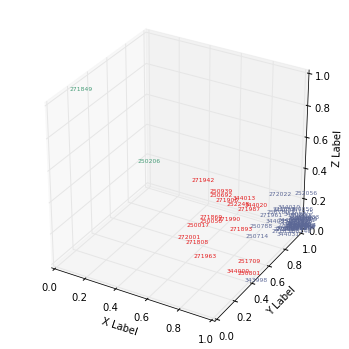

In [288]:
rf.plot_embedding()